# PORTFOLIO MOVING AVERAGE (PMA)

In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import itable
import ffn
import talib

def side_by_side(*objs, **kwds):
    from pandas.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))

In [2]:
import ffn

from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

%matplotlib inline

# PMA001

INCEPTION DATES:

        inception
VCVSX  1986-06-17
VFIIX  1980-06-27
VUSTX  1986-05-19
FIRST BUY DATE = 1986-08-29 00:00:00



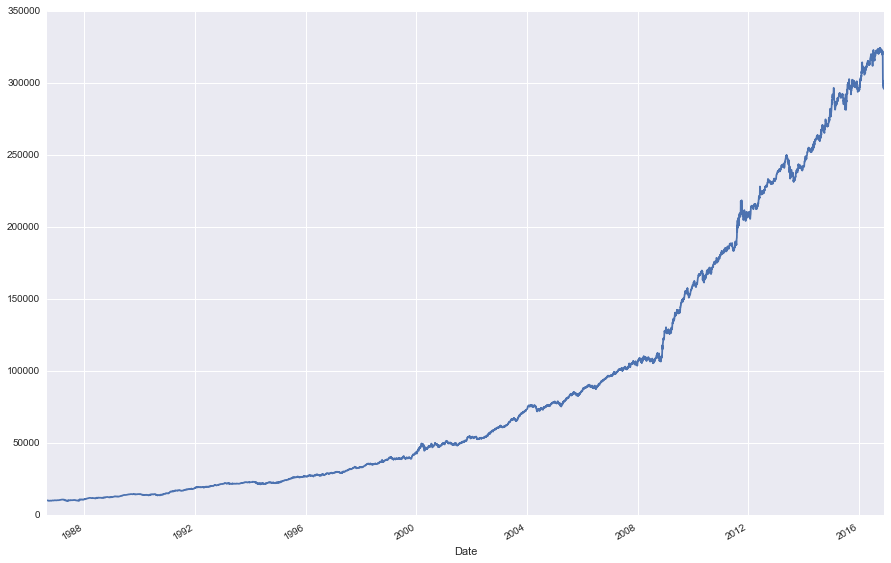

In [9]:
symbols =['VCVSX', 'VFIIX']
cash_proxy = 'VUSTX'

risk_lookback = 3
allocations = [0.6, 0.4]
frequency = 'M'

tickers = list(set(symbols + [cash_proxy]))

data = pd.DataFrame (columns=symbols)
for symbol in tickers :
    url = 'http://chart.finance.yahoo.com/table.csv?s=' + symbol + '&ignore=.csv'
    data[symbol] = pd.read_csv(url, parse_dates=True, index_col='Date').sort_index(ascending=True)['Adj Close']
    
inception_dates = pd.DataFrame([data[ticker].first_valid_index().date() for ticker in data.columns], 
                               index=data.keys(), columns=['inception'])
                               
print ('INCEPTION DATES:\n\n{}'.format(inception_dates))

prices = data.copy().dropna()

end_points = endpoints(period=frequency, trading_days=prices.index)
prices_m = prices.loc[end_points]

# elligibility rule
# SMA = prices_m.rolling(risk_lookback).mean().dropna()
SMA = pd.rolling_mean(prices_m, risk_lookback).dropna()
rebalance_dates = SMA.index
rule = prices_m.loc[rebalance_dates][symbols] > SMA[symbols]

# fixed weight allocation
weights = allocations * rule

# downside protection
weights[cash_proxy] = 1 - weights[symbols].sum(axis=1)

# backtest
p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [10]:
# algo stats
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-08-29 00:00:00 - 2016-11-29 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
2887.27%            1.62  11.88%  -10.30%

Annualized Returns:
mtd     3m      6m      ytd    1y      3y     5y     10y     incep.
------  ------  ------  -----  ------  -----  -----  ------  --------
-6.77%  -7.23%  -5.73%  1.46%  -0.01%  7.30%  7.73%  12.03%  11.88%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.62     1.66       1.86
mean    11.48%   11.52%     12.16%
vol     7.08%    6.94%      6.55%
skew    0.51     0.46       0.07
kurt    16.28    2.86       -0.30
best    7.76%    12.07%     25.68%
worst   -3.91%   -6.77%     -1.27%

Drawdowns:
max      avg       # days
-------  ------  --------
-10.30%  -0.94%     18.24

Misc:
---------------  ------
avg. up month    1.89%
avg. down month  -1.21%
up year %        96.67%
12m up %  

In [12]:
df

NameError: name 'df' is not defined

In [13]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

AttributeError: 'DataFrame' object has no attribute 'style'

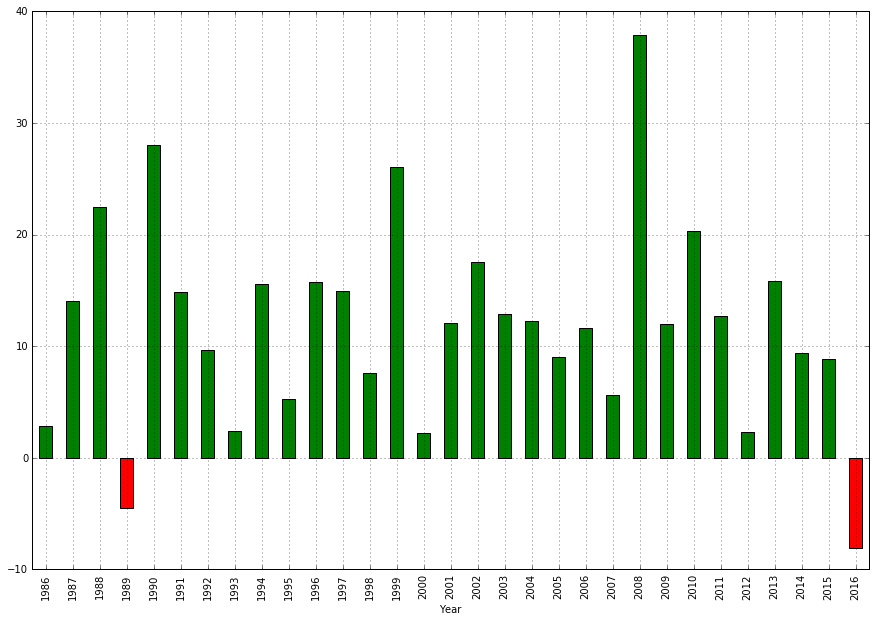

In [9]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# PMA002

INCEPTION DATES:

        inception
VCVSX  1986-06-17
VWINX  1980-01-02
VWEHX  1980-01-02
VUSTX  1986-05-19
FIRST BUY DATE = 1986-08-29 00:00:00



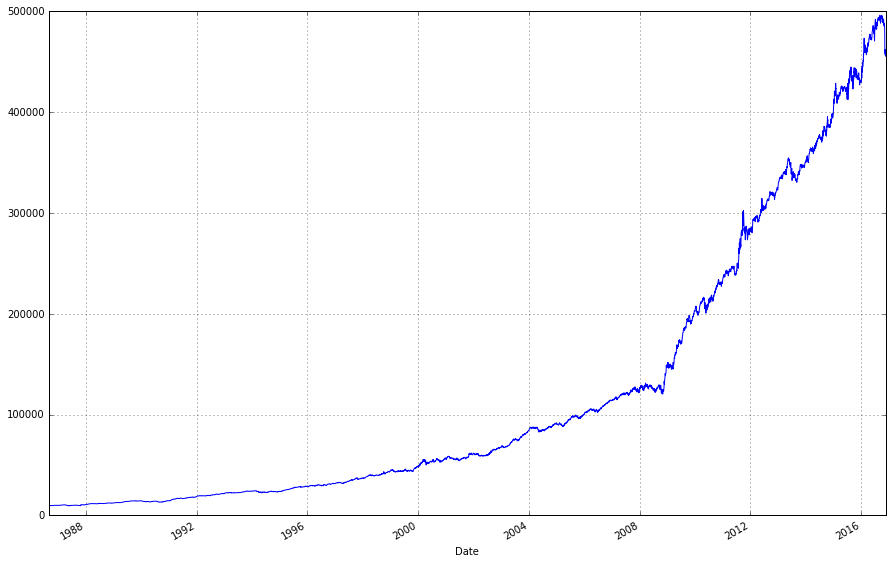

In [11]:
symbols =['VCVSX', 'VWINX', 'VWEHX']
cash_proxy = 'VUSTX'

tickers = list(set(symbols + [cash_proxy]))

start='1985-01-01'
end='2016-11-10'

data = pd.DataFrame (columns=symbols)
for symbol in tickers :
    url = 'http://chart.finance.yahoo.com/table.csv?s=' + symbol + '&ignore=.csv'
    data[symbol] = pd.read_csv(url, parse_dates=True, index_col='Date').sort_index(ascending=True)['Adj Close']
    
inception_dates = pd.DataFrame([data[ticker].first_valid_index().date() for ticker in data.columns], 
                               index=data.keys(), columns=['inception'])
                               
print ('INCEPTION DATES:\n\n{}'.format(inception_dates))

prices = data.copy().dropna()

end_points = endpoints(period='m', trading_days=prices.index)
prices_m = prices.loc[end_points]

risk_lookback = 3
allocations = [0.6, 0.2, 0.2]

# elligibility rule
# SMA = prices_m.rolling(risk_lookback).mean().dropna()
SMA = pd.rolling_mean(prices_m, risk_lookback).dropna()
rebalance_dates = SMA.index
rule = prices_m.loc[rebalance_dates][symbols] > SMA[symbols]

# fixed weight allocation
weights = allocations * rule

# downside protection
weights[cash_proxy] = 1 - weights[symbols].sum(axis=1)

# backtest
p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [12]:
# algo stats
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-08-29 00:00:00 - 2016-11-23 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
4456.86%            1.65  13.46%  -11.02%

Annualized Returns:
mtd     3m      6m      ytd    1y     3y     5y      10y     incep.
------  ------  ------  -----  -----  -----  ------  ------  --------
-6.42%  -7.77%  -3.85%  6.13%  4.61%  9.58%  10.68%  14.93%  13.46%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.65     1.64       1.75
mean    12.93%   13.00%     13.88%
vol     7.83%    7.91%      7.95%
skew    0.50     0.52       0.90
kurt    13.13    2.17       1.87
best    7.76%    12.07%     37.94%
worst   -3.45%   -6.42%     -1.75%

Drawdowns:
max      avg       # days
-------  ------  --------
-11.02%  -1.08%     19.34

Misc:
---------------  ------
avg. up month    2.15%
avg. down month  -1.39%
up year %        96.67%
12m up %   

In [13]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

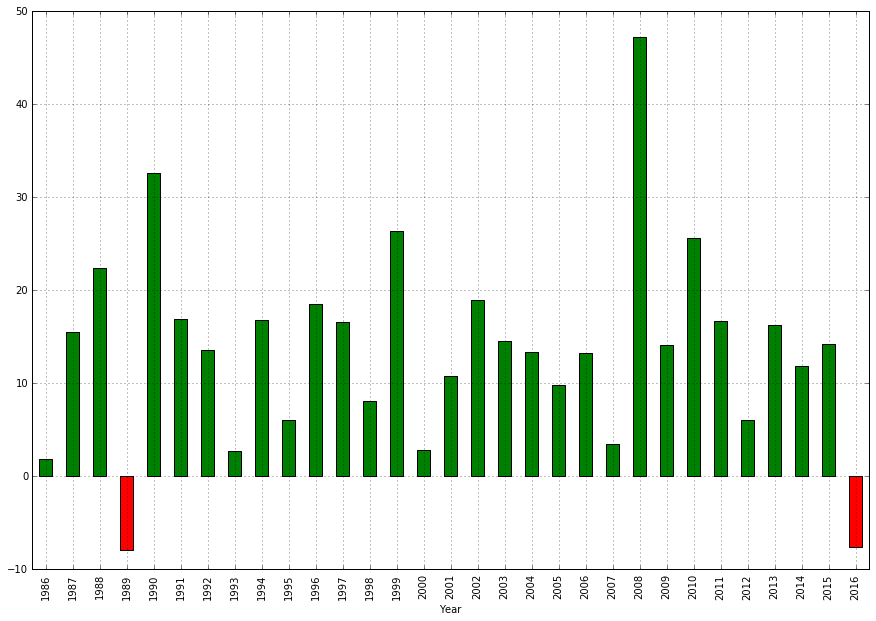

In [14]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# PMA003

INCEPTION DATES:

        inception
VCVSX  1986-06-17
VWINX  1980-01-02
VWEHX  1980-01-02
VUSTX  1986-05-19
FIRST BUY DATE = 1986-08-29 00:00:00



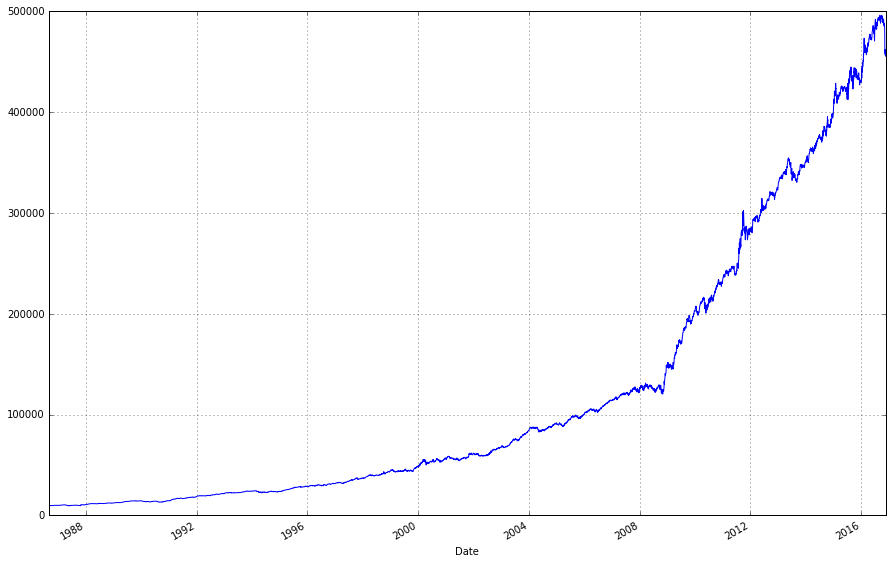

In [15]:
symbols =['VCVSX', 'VWINX', 'VWEHX']
cash_proxy = 'VUSTX'

tickers = list(set(symbols + [cash_proxy]))

start='1985-01-01'
end='2016-11-10'

data = pd.DataFrame (columns=symbols)
for symbol in tickers :
    url = 'http://chart.finance.yahoo.com/table.csv?s=' + symbol + '&ignore=.csv'
    data[symbol] = pd.read_csv(url, parse_dates=True, index_col='Date').sort_index(ascending=True)['Adj Close']
    
inception_dates = pd.DataFrame([data[ticker].first_valid_index().date() for ticker in data.columns], 
                               index=data.keys(), columns=['inception'])
                               
print ('INCEPTION DATES:\n\n{}'.format(inception_dates))

prices = data.copy().dropna()

end_points = endpoints(period='m', trading_days=prices.index)
prices_m = prices.loc[end_points]

risk_lookback = 3
allocations = [0.6, 0.2, 0.2]

# elligibility rule
# SMA = prices_m.rolling(risk_lookback).mean().dropna()
SMA = pd.rolling_mean(prices_m, risk_lookback).dropna()
rebalance_dates = SMA.index
rule = prices_m.loc[rebalance_dates][symbols] > SMA[symbols]

# fixed weight allocation
weights = allocations * rule

# downside protection
weights[cash_proxy] = 1 - weights[symbols].sum(axis=1)

# backtest
p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [16]:
# algo stats
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-08-29 00:00:00 - 2016-11-23 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
4456.86%            1.65  13.46%  -11.02%

Annualized Returns:
mtd     3m      6m      ytd    1y     3y     5y      10y     incep.
------  ------  ------  -----  -----  -----  ------  ------  --------
-6.42%  -7.77%  -3.85%  6.13%  4.61%  9.58%  10.68%  14.93%  13.46%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.65     1.64       1.75
mean    12.93%   13.00%     13.88%
vol     7.83%    7.91%      7.95%
skew    0.50     0.52       0.90
kurt    13.13    2.17       1.87
best    7.76%    12.07%     37.94%
worst   -3.45%   -6.42%     -1.75%

Drawdowns:
max      avg       # days
-------  ------  --------
-11.02%  -1.08%     19.34

Misc:
---------------  ------
avg. up month    2.15%
avg. down month  -1.39%
up year %        96.67%
12m up %   

In [17]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

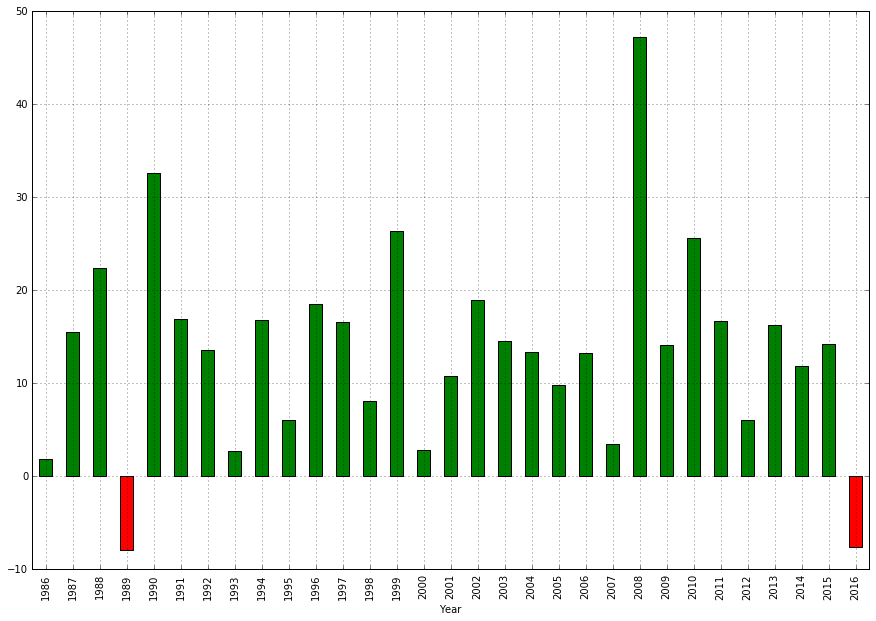

In [18]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# SCRATCHPAD